# **MECS6616 Spring 2025 - Project 2**

# **Introduction**

***IMPORTANT:***
- **Before starting, make sure to read the [Assignment Instructions](https://courseworks2.columbia.edu/courses/197115/pages/assignment-instructions) page on Courseworks to understand the workflow and submission requirements for this project.**

This project aims to demonstrate how neural networks can be used in a robotics setting. We will continue using the 2D maze environment introduced in Project 1 and learn to navigate an agent to a goal. Since neural networks can be more powerful models than the ones we had access to in Project 1, we can afford to make some changes to the 2D maze environment and make the problem more difficult. The project is divided into three parts: In Part I, you will train a simple Deep Neural Network (DNN) to predict the optimal action towards the goal given the agent position and the goal position. In Parts II and III, you will train Convolutional Neural Networks (CNNs) to predict the optimal action given images of the maze environment.

<div>
<img src="https://github.com/roamlab/robot-learning-S2023/blob/main/project2/imgs/P1_side.png?raw=true" width="300"/>
</div>

The figure above illustrates the simulation world, where the "robot" (also referred to as "agent") is represented by a green dot, and the goal location is marked by a red square. The agent's objective is to navigate to this goal location, avoiding any obstacles (depicted as black boxes) along the way.

**Unlike the previous project, the robot and the goal are spawned at random positions in the maze.** Also, the action space now contains all four directions: 'up', 'down', 'left' and 'right'. Another change is that, in addition to the obstacle map shown above, we introduce two new obstacle maps as shown below. However, these new maps will not be used until Part III.

<div>
<img src="https://github.com/roamlab/robot-learning-S2023/blob/main/project2/imgs/map1.png?raw=true" width="300"/>
<img src="https://github.com/roamlab/robot-learning-S2023/blob/main/project2/imgs/map2.png?raw=true" width="300"/>
<img src="https://github.com/roamlab/robot-learning-S2023/blob/main/project2/imgs/map3.png?raw=true" width="300"/>
</div>

We want to learn to navigate the agent by imitating demonstrations from an expert user. In all three parts, you will be using data collected by a human controlling the agent via a keyboard for training.

# **Project Setup (do NOT change)**

***IMPORTANT:***
- Do NOT change this "*Project Setup*" section
- Do NOT install any other dependencies or a different version of an already provided package. You may, however, import other packages
- Your code should go under the subsequent sections with headings "*Part 1*", "*Part 2*", and "*Part 3*"
- You may find it useful to minimize sections using the arrows located to the left of each section heading
- You may not use pre-trained models or any form of transfer learning for Part 2 and Part 3

You will be accessing data files located in a Google Drive folder. The following cell downloads the data from the cloud

In [ ]:
# DO NOT CHANGE
# Download data
!wget https://www.dropbox.com/scl/fi/gy1d0ifkwuusmdjv796dl/project2.zip?rlkey=h6wresrsqxiryhlvrssjla5hn&st=cfvqccqm&dl=0
!mv project2.zip?rlkey=h6wresrsqxiryhlvrssjla5hn project2.zip

--2025-03-12 18:25:07--  https://www.dropbox.com/scl/fi/gy1d0ifkwuusmdjv796dl/project2.zip?rlkey=h6wresrsqxiryhlvrssjla5hn
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1e196f8823ab3cab04e4571818.dl.dropboxusercontent.com/cd/0/inline/CltWgV4PKsCilGxRA41_gswcQ1MnIIi5RLys0NxGeoKiAKcTnsb4mgcM5ISjR8iVDS5N3jNIjkiGcQYjmCzFnN_SqbZ7Ac1B3TGbe0fUzyEXqwyj5H-xWxid80QOF3WWINz-iHzvxvSNcikWemDrskiB/file# [following]
--2025-03-12 18:25:07--  https://uc1e196f8823ab3cab04e4571818.dl.dropboxusercontent.com/cd/0/inline/CltWgV4PKsCilGxRA41_gswcQ1MnIIi5RLys0NxGeoKiAKcTnsb4mgcM5ISjR8iVDS5N3jNIjkiGcQYjmCzFnN_SqbZ7Ac1B3TGbe0fUzyEXqwyj5H-xWxid80QOF3WWINz-iHzvxvSNcikWemDrskiB/file
Resolving uc1e196f8823ab3cab04e4571818.dl.dropboxusercontent.com (uc1e196f8823ab3cab04e4571818.dl.dropboxusercontent.com)... 162.125.5.15, 2620:1

In [ ]:
# Make sure you have successfully uploaded the zip file to Colab before running the line below.
# If wget fails to pull the zip file, you can download the zipfile from dropbox and manually upload it to collab instead
# If you do decide to manually upload the file, use the dropbox link in the previous cell (after wget) to access the file
# Make sure the zip file is named "project2.zip", rename it before uploading (if necessary)
# Upload the entire zip file to google colab. Do not unzip before uploading

# Unzip the uploaded zip file
!unzip -o project2.zip -d /content/

Archive:  project2.zip
   creating: /content/mjcf/
  inflating: /content/mjcf/point_mass.xml  
   creating: /content/mjcf/common/
  inflating: /content/mjcf/common/skybox.xml  
  inflating: /content/mjcf/common/visual.xml  
  inflating: /content/mjcf/common/materials.xml  
  inflating: /content/mjcf/test_mjcf.xml  
  inflating: /content/dnn.py         
   creating: /content/imgs/
  inflating: /content/imgs/P1_side.png  
  inflating: /content/imgs/map1.png  
  inflating: /content/imgs/map3.png  
  inflating: /content/imgs/map2.png  
  inflating: /content/score_policy.py  
  inflating: /content/simple_maze.py  
  inflating: /content/data_utils.py  
   creating: /content/data/
  inflating: /content/data/map1.pkl  
  inflating: /content/data/all_maps.pkl  


In [ ]:
# DO NOT CHANGE

# Install required packages
!pip install pybullet numpngw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 7.0 MB/s eta 0:00:00


# Part I. Behavioral cloning with low dimensional data

This part is a natural extension of Part II in Project 1, where your agent needs to learn a policy using labeled examples from an expert.

Each labeled example $i$ will contain a tuple of the form $(o, a)^i$, where $o$ represents an observation and $a$ represents the action taken by the expert given that observation. You must simply learn to imitate the expert, a process also known as behavioral cloning. Note that while the observation space will be different in each part, the action space is the same for the rest of the project.

We will be training a DNN policy to predict an action to be taken ('up', 'down', 'left', and 'right') based on the observation. **In Part I, the observation will contain the agent position and the current goal position.** (Since the goal is sampled randomly, the policy has to know the current goal to be reached). The environment thus returns an observation array of size (4, ) where the agent position is contained in the first two axes and the current goal position is contained in the next two. **In Part I, the map that the robot is navigating is always the same.**

PyTorch and Tensorflow are two popular frameworks for building and training neural networks but for this class, we will be exclusively using PyTorch and you are allowed to use any of its features. A good starting point can be found [here](https://github.com/roamlab/robot-learning-S2024/blob/main/dnn_example.py).

You will implement a class that inherits from `RobotPolicy` by providing implementations for the abstract methods from the class. These abstract methods will be re-used by future parts of the project, so do not edit them.



In [ ]:
# DO NOT CHANGE
# base class

import abc

class RobotPolicy(abc.ABC):

    @abc.abstractmethod
    def train(self, data):
        """
            Abstract method for training a policy.

            Args:
                data: a dict that contains X (key = 'obs') and y (key = 'actions').

                X is either rgb image (N, 64, 64, 3) OR  agent & goal pos (N, 4)

            Returns:
                This method does not return anything. It will just need to update the
                property of a RobotPolicy instance.
        """

    @abc.abstractmethod
    def get_action(self, obs):
        """
            Abstract method for getting action. You can do data preprocessing and feed
            forward of your trained model here.
            Args:
                obs: an observation (64 x 64 x 3) rgb image OR (4, ) positions

            Returns:
                action: an integer between 0 to 3
        """

In [ ]:
# Implement your solution for Part 1 below
import torch
torch.manual_seed(0)
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

class POSBCRobot(RobotPolicy):

    def train(self, data):
        key = torch.tensor(data['obs'], dtype=torch.float32)
        value = torch.tensor(data['actions'])
        #print(key, value)
        dataset = TensorDataset(key, value)
        dataloader = DataLoader(dataset, batch_size=64, shuffle=True)
        self.model = nn.Sequential(
            nn.Linear(4, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(32, 4)
        )
        self.loss_fn = nn.CrossEntropyLoss()
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=0.001)

        for epoch in range(300):
            total_loss = 0
            for x, y in dataloader:
                y_pred = self.model(x)
                loss = self.loss_fn(y_pred, y)
                self.optimizer.zero_grad()
                loss.backward()
                total_loss += loss.item()
                self.optimizer.step()

            #print('loss', total_loss)


    def get_action(self, obs):
        obs = torch.tensor(obs, dtype=torch.float32)
        self.model.eval()
        with torch.no_grad():
          predictions = self.model(obs)
          predictions = torch.argmax(predictions)
        return predictions


## Evaluation and Grading

We will evaluate your model by simply having the agent follow the commands that it provides.  We will evaluate for 100 different randomly sampled starting positions and goals. For each goal, we roll out the trained policy for 50 steps. After the 50 steps, we will evaluate the closest distance to the goal the agent has ended up. If the agent reaches < 0.1 distance from the goal, the episode is ended before 50 steps and the minimum distance will be recorded as 0. The score is the fraction of the initial distance to goal covered by the agent averaged over 100 trials. Your final grade will be computed based on this score.

We will calculate the score using the formula :

```score = avg[(init_dist -  min_dist) / init_dist]```

We will auto-generate your grades using the code below. The grading of each part is separate from each other so you can get the grade right after each part is finished.

The total points of this assignment are 15. According to the difficulty level of each part, parts 1, 2, and 3 have 4, 5, 6 points respectively.

- Part 1: if your score >= 0.99, you will receive 4 / 4. Otherwise, your final grade will be score / 0.99 * 4.
- Part 2: if your score >= 0.95, you will receive 5 / 5. Otherwise, your final grade will be score / 0.95 * 5.
- Part 3: if your score >= 0.95, you will receive 6 / 6. Otherwise, your final grade will be score / 0.95 * 6.

The score function for each part provides two extra arguments to assist your debugging.

- gui: If this is set to True, you will save the behavior of the agents during evaluation as an animation file. This animation file can be visualized using the provided code below to help you understand the behavior of the agent. **Please set it to False before your submission as it will slow down evaluation.**
- model: If you provide a path to a saved model, the score function will not train from scratch but will instead load the save model. **Please set it to None before submission.** Any models you generate during runtime will be automatically deleted when disconnected. The grader will train the model from scratch.

In [ ]:
# DO NOT CHANGE
# Set up grading

import score_policy
import importlib
importlib.reload(score_policy)
from IPython.display import Image


part1_bound = 0.99
part2_bound = 0.95
part3_bound = 0.95

In [ ]:
# DO NOT CHANGE
# Getting the score and grade for Part 1

score1 = score_policy.score_pos_bc(policy=POSBCRobot(), gui=True, model=None)
grade1 = score1 / part1_bound * 4 if score1 < part1_bound else 4

print('\n---')
print(f'Part 1 Score: {score1}')
print(f'Part 1 Grade: {score1:.2f} / {part1_bound:.2f} * 4 = {grade1:.2f}')


---
Part 1 Score: 0.985758262196645
Part 1 Grade: 0.99 / 0.99 * 4 = 3.98


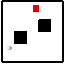

In [ ]:
# Optionally, uncomment and run the code below if you have saved an animation (gui = True) that you want to visualize.

Image(filename='part_1_anim.png', width=200, height=200)

# Part II. Behavioral cloning with visual observations

In this part, you are asked to do a similar task as Part I, **but the observations will be RGB image observations of the world**, similar to the ones you used to do localization in Part III of Project 1. To process the RGB images, you will be implementing a CNN using PyTorch. [The official PyTorch tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) is a good starting point. As in Part I, the map that the robot is navigating is always the same. **This means that your model really only has to learn how to figure out where the robot and the goal are located, and how to navigate around a fixed set of obstacles.**

All requirements from your code, as well as the evaluation method, are unchanged compared to Part I. The only difference is the nature of the observation that is provided to you.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class RGBBCRobot1(RobotPolicy):
    def __init__(self):
        super(RGBBCRobot1, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(16),  # Batch normalization added
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Downsample
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(128 * 16 * 16, 256),  # Adjusted for new feature size
            nn.ReLU(),
            nn.Dropout(0.3),  # Dropout added
            nn.Linear(256, 4)  # 4 categories output
        )
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)

    def train(self, data, epochs=5, batch_size=32):  # Increased epochs for more training
        obs_data = torch.tensor(data["obs"], dtype=torch.float32).permute(0, 3, 1, 2)  # (N, 64, 64, 3) -> (N, 3, 64, 64)
        action_data = torch.tensor(data["actions"], dtype=torch.long)

        dataset = TensorDataset(obs_data, action_data)
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

        for epoch in range(epochs):
            total_loss = 0
            for obs_batch, action_batch in dataloader:
                self.optimizer.zero_grad()
                outputs = self.model(obs_batch)
                loss = self.criterion(outputs, action_batch)
                loss.backward()
                self.optimizer.step()
                total_loss += loss.item()
            #print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(dataloader):.4f}")

        #print("Training complete.")

    def get_action(self, obs):
        obs_tensor = torch.tensor(obs, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)  # (64, 64, 3) -> (1, 3, 64, 64)
        with torch.no_grad():
            logits = self.model(obs_tensor)
            probs = torch.softmax(logits, dim=1)
            action = torch.argmax(probs, dim=1).item()
        return action


## Evaluation and Grading

In [ ]:
# DO NOT CHANGE
# Getting the score and grade for Part 2

score2 = score_policy.score_rgb_bc1(policy=RGBBCRobot1(), gui=False, model=None)
grade2 = score2 / part2_bound * 5 if score2 < part2_bound else 5

print('\n---')
print(f'Part 2 Score: {score2}')
print(f'Part 2 Grade: {score2:.2f} / {part2_bound:.2f} * 5 = {grade2:.2f}')


---
Part 2 Score: 0.9139035250931244
Part 2 Grade: 0.91 / 0.95 * 5 = 4.81


In [ ]:
# Optionally, uncomment and run the code below if you have saved an animation (gui = True) that you want to visualize.

#Image(filename='part_2_anim.png', width=200, height=200)

# Part III. Behavioral cloning with visual observations - multiple maps

This part is the same as  Part II except that it is trained and tested differently. **The training set involves expert demonstrations for the two new obstacle maps. And while testing, for each trial, a different obstacle map is randomly selected.** This means that your model has to learn how to reason about what an obstacle is, and how to go around it, based on nothing more than an image. The main objective of this part is to show that, when using a CNN, it is possible for a model to achieve this. The evaluation method for this part is the same as Part I and II.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class RGBBCRobot2(RobotPolicy):
    def __init__(self):
        super(RGBBCRobot2, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(16),  # Batch normalization added
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Downsample
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(128 * 16 * 16, 256),  # Adjusted for new feature size
            nn.ReLU(),
            nn.Dropout(0.5),  # Dropout added
            nn.Linear(256, 4)  # 4 categories output
        )
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        #self.model = torch.compile(self.model)

    def train(self, data, epochs=5, batch_size=64):  # Increased epochs for more training
        obs_data = torch.tensor(data["obs"], dtype=torch.float32).permute(0, 3, 1, 2)  # (N, 64, 64, 3) -> (N, 3, 64, 64)
        action_data = torch.tensor(data["actions"], dtype=torch.long)

        dataset = TensorDataset(obs_data, action_data)
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

        for epoch in range(epochs):
            total_loss = 0
            for obs_batch, action_batch in dataloader:
                self.optimizer.zero_grad()
                outputs = self.model(obs_batch)
                loss = self.criterion(outputs, action_batch)
                loss.backward()
                self.optimizer.step()
                total_loss += loss.item()
            #print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(dataloader):.4f}")

        #print("Training complete.")

    def get_action(self, obs):
        obs_tensor = torch.tensor(obs, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)  # (64, 64, 3) -> (1, 3, 64, 64)
        with torch.no_grad():
            logits = self.model(obs_tensor)
            probs = torch.softmax(logits, dim=1)
            action = torch.argmax(probs, dim=1).item()
        return action


## Evaluation and Grading


In [ ]:
# DO NOT CHANGE
# Getting the score and grade for Part 3

score3 = score_policy.score_rgb_bc2(policy=RGBBCRobot2(), gui= False, model=None)
grade3 = score3 / part3_bound * 6 if score3 < part3_bound else 6

print('\n---')
print(f'Part 3 Score: {score3}')
print(f'Part 3 Grade: {score3:.2f} / {part3_bound:.2f} * 6 = {grade3:.2f}')


---
Part 3 Score: 0.8029953939532054
Part 3 Grade: 0.80 / 0.95 * 6 = 5.07


In [ ]:
# Optionally, uncomment and run the code below if you have saved an animation (gui = True) that you want to visualize.

#Image(filename='part_3_anim.png', width=200, height=200)

# Other Requirements and Hints

- **Training time**: To keep auto-grading feasible, your total training time must be strictly under 3 mins, 15mins, and 10 mins for parts 1, 2, and 3. These time budgets are more than enough to achieve full credits on this project. Note that longer training time does not necessarily mean higher performance because of overfitting. The faster your network trains the better!
- **Memory usage**: Make sure your code does not require too much memory. The required amount of RAM for this assignment should not be more than 8GB.
- **NO GPU**: No GPU is required or allowed for this assignment.
- **Reproducibility**: We have ensured that the randomness of the environment is deterministic. To get reproducible scores you must ensure your model training and prediction are also reproducible. The randomly initialized weights of the neural network should be made repeatable using seeding. You can add PyTorch seeding method below and see [PyTorch Reproducibility](https://pytorch.org/docs/stable/notes/randomness.html) to learn more.
  ```
  import torch
  torch.manual_seed(0)
  ```
- **Classifier**: In all the parts we are training a neural network to solve a classification problem and it is important to use a reasonable loss function. For example, the MSE (mean squared classification) error has drawbacks related to sensitivity. Cross entropy loss usually has good performance for classification tasks and you can find the documentation for it [here](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) and is further explained below. However, note that you are free to use any loss function you like.
  - Cross entropy is a concept from information theory which is defined for two probability distributions. Cross entropy is minimum when the two distributions involved are the same and this is the property that makes it useful as a loss function in the context of machine learning. The idea is to minimize the cross entropy between the prediction distribution and the label distribution. For our case where we are training a neural network for classification, we can have the network output a score for each action. Cross entropy can be computed from these scores by converting to probability values (using softmax) and comparing it with the label distribution. The label distribution is obtained simply by assigning a probability of 1 to ground truth action and 0 to all other actions. Once trained, the best action can found by just choosing the action with the highest probability (i.e., the highest score) as predicted by the network.
- **Optimizer**: While it is possible to use a simple optimizer to achieve the desired accuracy, the training time can be quite high. There exist a number of optimizers implemented in PyTorch that have much faster convergence.
- **Parameter tuning**: Keep your architectures simple and slowly add complexity (more layers/kernels) to improve accuracy. Remember "To Err is Human" and the expert data (collected by a human) that you are training on is not perfect. Having a 100% training accuracy (very small training loss) might not be the best for achieving the highest score. So make sure your model does not overfit during training.
- **PyTorch input shape**: Notice that the expected input shape to CONV2D in PyTorch is (N, C, H, W), where N is the batch size, C is the number of channels, H is the image height and W is the image width. You will need to switch axes for the incoming images in order for them to be correctly passed to the first convolution layer.